C 1.4.6

## Image Gradients

1. Sobel and Scharr Derivatives

2. Laplacian Derivatives

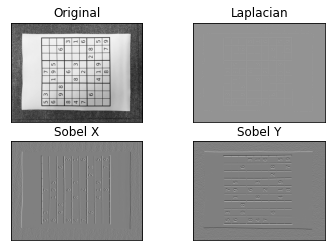

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('dave.jpg',0)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()


One Important Matter!

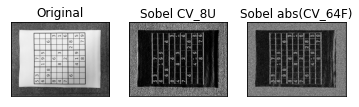

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('dave.jpg',0)
# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])

plt.show()

c 1.4.7

## Canny Edge Detection


1. Noise Reduction
2. Finding Intensity Gradient of the Image
3. Non-maximum Suppression
4. Hysteresis Thresholding


Canny Edge Detection in OpenCV


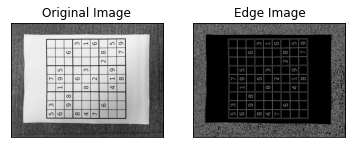

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('dave.jpg',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()


c 1.4.8 Image Pyramids (skip)


c 1.4.9

## Contours in OpenCV (p.85~94)

## Contours : Getting Started

What are contours?

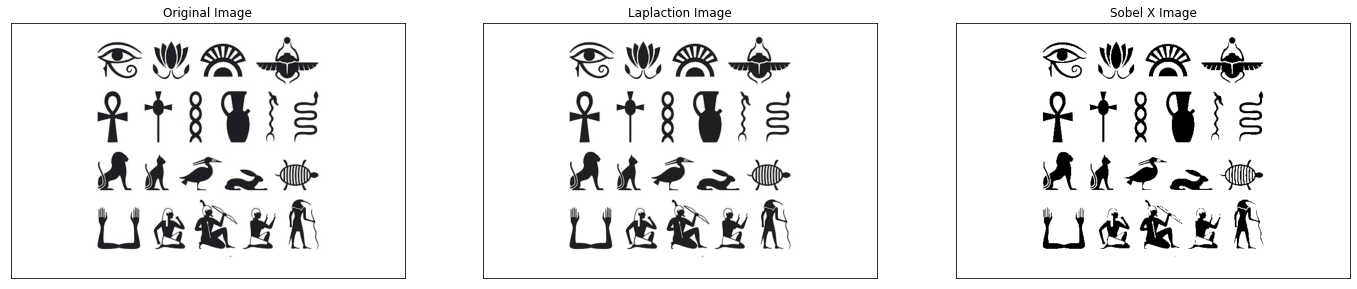

In [153]:
import numpy as np
import cv2

im = cv2.imread('ancient-Egyptian-symbols.jpg')
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,100,255,0)

plt.figure(figsize=(24,8)) #그래프 사이즈 설정 - figsize(가로길이,세로길이)
plt.subplot(1, 3, 1), plt.imshow(im)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2), plt.imshow(imgray, cmap = 'gray')
plt.title('Laplaction Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3), plt.imshow(thresh, cmap = 'gray')
plt.title('Sobel X Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [156]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img0 = im.copy()
img1 = im.copy()
img0 = cv2.drawContours(img0, contours, -1, (255,0,0), 3)
img1 = cv2.drawContours(img1, contours, 3, (255,0,0), 3)

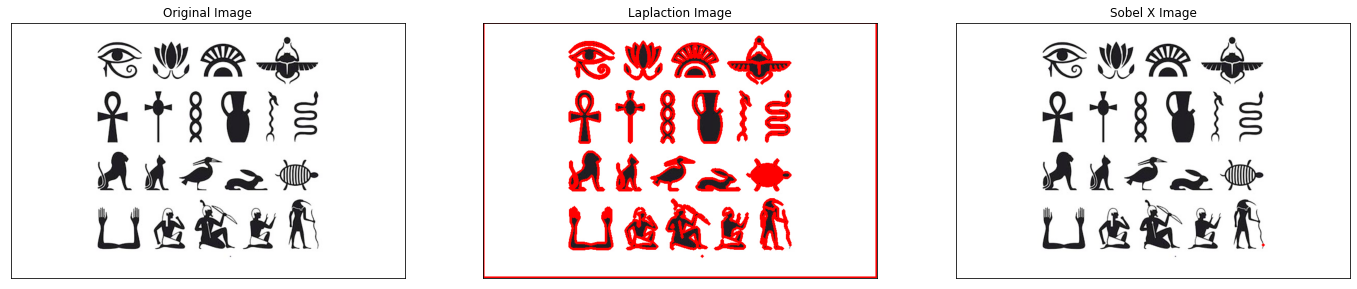

In [157]:
plt.figure(figsize=(24,8)) #그래프 사이즈 설정 - figsize(가로길이,세로길이)
plt.subplot(1, 3, 1), plt.imshow(im)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2), plt.imshow(img0, cmap= 'gray')
plt.title('Laplaction Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3), plt.imshow(img1, cmap= 'gray')
plt.title('Sobel X Image'), plt.xticks([]), plt.yticks([])

plt.show()


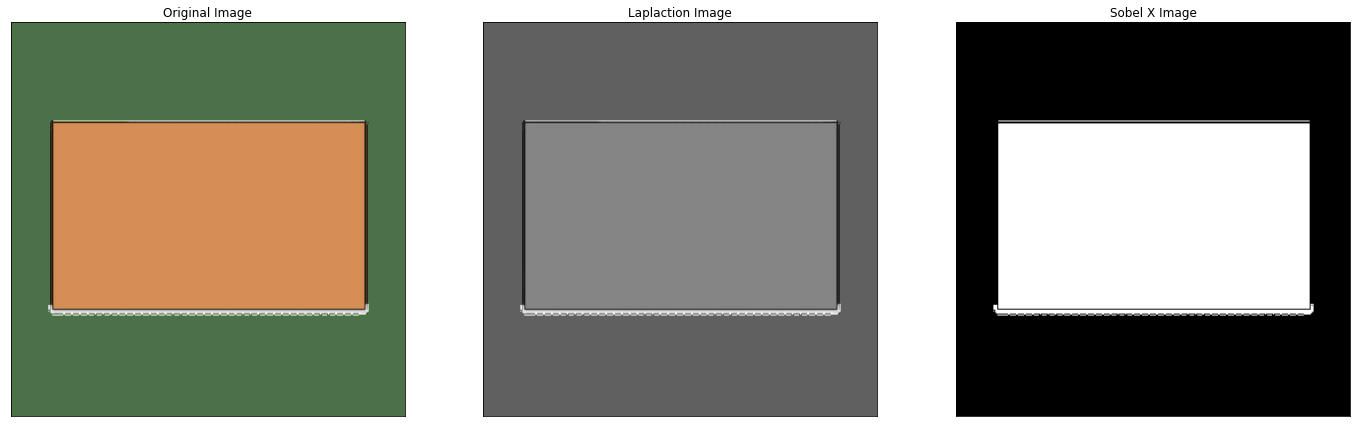

In [161]:
import numpy as np
import cv2

img = cv2.imread('rectangle.png')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(imgray, 100,255,0)

plt.figure(figsize=(24,8)) #그래프 사이즈 설정 - figsize(가로길이,세로길이)
plt.subplot(1, 3, 1), plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2), plt.imshow(imgray, cmap = 'gray')
plt.title('Laplaction Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3), plt.imshow(thresh, cmap = 'gray')
plt.title('Sobel X Image'), plt.xticks([]), plt.yticks([])
plt.show()


In [165]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img0 = img.copy()
img1 = img.copy()
img0 = cv2.drawContours(img0, contours, 2, (255,0,0), 3)
img1 = cv2.drawContours(img1, contours, 3, (255,0,0), 3)


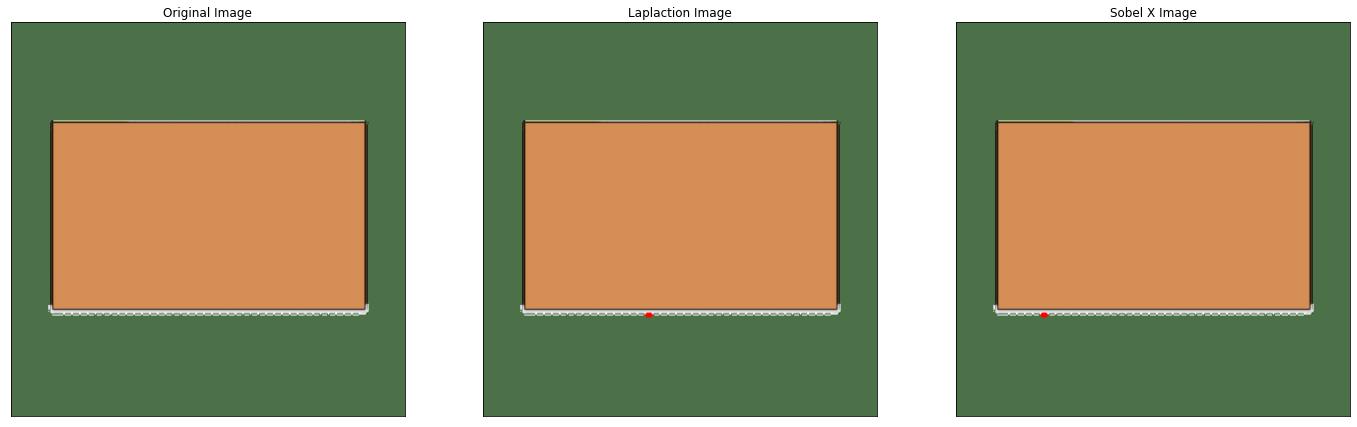

In [166]:
plt.figure(figsize=(24,8)) #그래프 사이즈 설정 - figsize(가로길이,세로길이)
plt.subplot(1, 3, 1), plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2), plt.imshow(img0, cmap= 'gray')
plt.title('Laplaction Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3), plt.imshow(img1, cmap= 'gray')
plt.title('Sobel X Image'), plt.xticks([]), plt.yticks([])

plt.show()


In [167]:
print(len(contours))

33


In [168]:
print(contours)

(array([[[316, 297]],

       [[320, 297]]], dtype=int32), array([[[237, 297]],

       [[241, 297]]], dtype=int32), array([[[166, 297]],

       [[170, 297]]], dtype=int32), array([[[ 87, 297]],

       [[ 91, 297]]], dtype=int32), array([[[ 38, 293]]], dtype=int32), array([[[360, 286]],

       [[360, 291]],

       [[359, 292]],

       [[ 42, 292]],

       [[ 41, 291]],

       [[ 41, 287]],

       [[ 38, 287]],

       [[ 38, 291]],

       [[ 39, 291]],

       [[ 40, 292]],

       [[ 40, 294]],

       [[ 41, 295]],

       [[ 52, 295]],

       [[ 53, 296]],

       [[ 52, 297]],

       [[ 42, 297]],

       [[ 52, 297]],

       [[ 53, 296]],

       [[ 54, 296]],

       [[ 55, 297]],

       [[ 60, 297]],

       [[ 61, 296]],

       [[ 62, 296]],

       [[ 63, 297]],

       [[ 68, 297]],

       [[ 69, 296]],

       [[ 70, 296]],

       [[ 71, 297]],

       [[ 76, 297]],

       [[ 77, 296]],

       [[ 78, 296]],

       [[ 79, 297]],

       [[ 83, 297]],

     

## Contour Features

1. Moments

In [179]:
cnt = contours[2]
M = cv2.moments(cnt)
print(M)


{'m00': 0.0, 'm10': 0.0, 'm01': 0.0, 'm20': 0.0, 'm11': 0.0, 'm02': 0.0, 'm30': 0.0, 'm21': 0.0, 'm12': 0.0, 'm03': 0.0, 'mu20': 0.0, 'mu11': 0.0, 'mu02': 0.0, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.0, 'nu11': 0.0, 'nu02': 0.0, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}


In [174]:
cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])

ZeroDivisionError: float division by zero

In [134]:
img0 = cv2.rectangle(img0. (cx-2, cy-2), (cx+2,c cy+2), (0.0.255), 2)

SyntaxError: invalid syntax (1013498855.py, line 1)

2. Contour Area

In [73]:
area = cv2.contourArea(cnt)

3. Contour Perimeter

In [74]:
perimeter = cv2.arcLength(cnt,True)

4. Contour Approximation

In [75]:
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

5. Convex Hull

In [76]:
hull = cv2.convexHull(points[, hull[, clockwise[, returnPoints]]


SyntaxError: invalid syntax (3452574207.py, line 1)

In [77]:
hull = cv2.convexHull(cnt)


6. Checking Convexity

In [78]:
k = cv2.isContourConvex(cnt)

7.a. Straight Bounding Rectangle

In [79]:
x,y,w,h = cv2.boundingRect(cnt)
img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)


7.b. Rotated Rectangle


In [80]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
im = cv2.drawContours(im,[box],0,(0,0,255),2)

8. Minimum Enclosing Circle

In [81]:
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img = cv2.circle(img,center,radius,(0,255,0),2)

9. Fitting an Ellipse


In [82]:
ellipse = cv2.fitEllipse(cnt)
im = cv2.ellipse(im,ellipse,(0,255,0),2)


10. Fitting a Line


In [83]:
rows,cols = img.shape[:2]
[vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
img = cv2.line(img,(cols-1,righty),(0,lefty),(0,255,0),2)